<h1><center> Neural Networks</center></h1>

<h2> A. Neural Networks for Handwritten Character Recognition </h2>

<h3> Introduction </h3>

The goal of this project is to implement neural network algorithm for recognizing the handwritten digits. The idea is to take a large number of training examples (handwritten digits) to automatically infer and develop rules to recognize handwritten digits.

In [1]:
import numpy as np
import pandas as pd

<h4> 1. Load Data </h4>

In [2]:
#import training data
data_train = pd.read_csv('data/optdigits.tra',sep=',', header=None)
train = pd.DataFrame(data_train)
x1 = train.iloc[:,:-1]
y1 = train.iloc[:,-1]
x_train = x1
y_train = pd.get_dummies(y1) #hot encode the output data of training dataset

#import test data
data_test = pd.read_csv('data/optdigits.tes',sep=',', header=None)
test = pd.DataFrame(data_test)
x2 = test.iloc[:,:-1]
y2 = test.iloc[:,-1]
x_test = x2
y_test = pd.get_dummies(y2)  #hot encode the output data of test dataset

<h4> 2. Training </h4>

<b> Model Initialization </b>

First, in the __init__ function, three-layer network is constructed (input, 2-hidden layers, output) and weights and bias are assigned randomly:

* Input layer - 64 neurons 
* Hidden layer 1 - 128 neurons
* Hidden layer 2 - 128 neurons
* Output layer - 10 neurons (output one-hot array)


<b>Forward Propagation:</b>

In forward propagation step, output is computed as follows:

* z = (input * weights) + bias
* a = activation(z)

The output of the one layer will be input to the next layer and sigmoid function is used as activation function in all the layers. Here, final result is given by a3 which is output of the neural network model.

<b>Backward Propagation:</b>

In back propagation, weights of neural networks are modified in order to minimize the total loss function. Cost function is used to find the error i.e measure how well the network is performing compared to actual labels. This error is back propagated to all the weight matrices by computing gradients in each layer and weights are updated.

<b> Prediction </b>

Once the model is trained, we can perform prediction on our test dataset. Inputs are passed to feed foward network inorder to predict the output.

In [8]:
alist=[]
class neural_network:
    
    def __init__(self, x, y,input_neurons,output_neurons):
        self.inputs = x
        self.output = y
        self.result = np.zeros(self.output.shape)
        neurons = 128
        print("No of neurons in hidden layer",neurons)
        self.lr = 0.5
        print("Learning Rate",self.lr)
        
        #input_neurons = 64 #self.inputs.shape[1] # 64 number of input neurons
        #output_neurons = 10 #self.outputs.shape[1]  # 10 number of output neurons
        
        self.input_neurons = input_neurons  #self.inputs.shape[1] # 64 number of input neurons
        self.output_neurons = output_neurons #self.outputs.shape[1]  # 10 number of output neurons
        
        np.random.seed(1)
        self.w1 = np.random.randn(input_neurons, neurons)
        self.b1 = np.zeros((1, neurons))
        self.w2 = np.random.randn(neurons, neurons)
        self.b2 = np.zeros((1, neurons))
        self.w3 = np.random.randn(neurons, output_neurons)
        self.b3 = np.zeros((1, output_neurons))
        
    
    def sigmoid(self, x):
        return 1/(1 + np.exp(-x))

    def sigmoid_derivative(self,x):
        return x * (1 - x)
    
    def softmax(self, x):
        exps = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exps/np.sum(exps, axis=1, keepdims=True)

    def cross_entropy(self, pred, real):
        n_samples = real.shape[0]
        res = pred - real
        return res/n_samples

    def cost_function(self, pred, real):
        n_samples = real.shape[0]
        logp = - np.log(pred[np.arange(n_samples), real.argmax(axis=1)])
        loss = np.sum(logp)/n_samples
        return loss
    
    def forward_prop(self):
        self.a1 = self.sigmoid(np.dot(self.inputs, self.w1)+self.b1)
        self.a2 = self.sigmoid(np.dot(self.a1, self.w2)+self.b2)
        self.a3 = self.sigmoid(np.dot(self.a2, self.w3)+self.b3) 
        #print(self.layer1.shape, self.layer2.shape,self.result.shape)
          
    #function to backpropagation   
    def backward_prop(self):
        loss = self.cost_function(self.a3,self.output)
        alist.append(loss)
        a3_delta = self.cross_entropy(self.a3, self.output) # w3
        z2_delta = np.dot(a3_delta, self.w3.T)
        a2_delta = z2_delta * self.sigmoid_derivative(self.a2) # w2
        z1_delta = np.dot(a2_delta, self.w2.T)
        a1_delta = z1_delta * self.sigmoid_derivative(self.a1) # w1

        self.w3 -= self.lr * np.dot(self.a2.T, a3_delta)
        self.b3 -= self.lr * np.sum(a3_delta, axis=0, keepdims=True)
        self.w2 -= self.lr * np.dot(self.a1.T, a2_delta)
        self.b2 -= self.lr * np.sum(a2_delta, axis=0)
        self.w1 -= self.lr * np.dot(self.inputs.T, a1_delta)
        self.b1 -= self.lr * np.sum(a1_delta, axis=0)
        return(loss)
        
    def predict(self, data):
        self.inputs = data
        self.forward_prop()
        #print(self.a3.argmax())
        return self.a3.argmax()
       


In [10]:
#main program    
model = neural_network(x_train/16.0, np.array(y_train),64,10)
epochs = 1500 #number of epochs

for x in range(epochs):
    model.forward_prop()
    #model.backward_prop()
    loss = model.backward_prop()
print('Loss is :', loss)
    

No of neurons in hidden layer 128
Learning Rate 0.5
Loss is : 0.03776675938859972


<h4> 3. Evaluation </h4>

The model evaluation metric accuracy was used to evaluate model's performance.

In [11]:
def get_accuracy(x,y,model):
    count = 0
    for i in range (x.shape[0]):
        if model.predict(x.iloc[i]) == y.iloc[i]:
            count= count +1
    #print('count:',count)
    accuracy = count/x.shape[0]
    print("The accuracy of model is:", accuracy)
            

In [12]:
get_accuracy(x_test,y2,model)

The accuracy of model is: 0.9298831385642737


ValueError: x and y must have same first dimension, but have shapes (1500,) and (1689,)

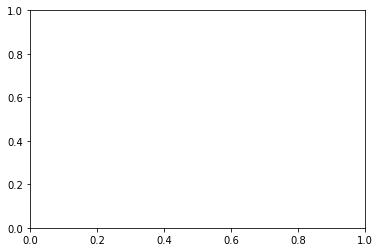

In [15]:
#Plot the Error vs Epochs
import matplotlib.pyplot as plt

x = np.arange(0, epochs, 1)
plt.plot(x,alist)
plt.xlabel('epochs')
plt.ylabel('error')

Accuracy = 93% (approx)

Using this model, for each 100 hand written instances, 93 were correctly classified.

<h2> B. FISHING DATA </h2>

For the fishing dataset, above process were carried out.

In [ ]:
 # read file
file1 = pd.read_csv('data/fishing.data', names = ["Wind", "Water", "Air", "Forecast", "class"])
data_1 = pd.DataFrame(file1[8:]).reset_index().drop('index', 1)
# splitting into training and test set
train_df = data_1.sample(frac=0.6,random_state=1321100) #random state is a seed value
test_df = data_1.drop(train_df.index).reset_index().drop('index', 1)
to_predict_row = pd.DataFrame([['Strong','Cold','Warm','Sunny']],columns=['Wind','Water','Air','Forecast'])
test_df = pd.concat([test_df,to_predict_row])

x1 = train_df.iloc[:,:-1]

y1 = train_df.iloc[:,-1]
x_train = pd.get_dummies(x1)
y_train = pd.get_dummies(y1)
#y_train = pd.get_dummies(y1) #hot encode the output data of training dataset

x2 = test_df.iloc[:,:-1]
test_df['class']= test_df['class'].map({'Yes':0, 'No':1})
y2 = test_df.iloc[:,-1]
x_test = pd.get_dummies(x2)
y_test = pd.get_dummies(y2)
print(x_train.shape,y_train.shape, x_test.shape, y_test.shape)

In [ ]:
### main program    
model2 = neural_network(x_train, np.array(y_train),9,2)
epochs = 1500 #number of epochs

for x in range(epochs):
    model2.forward_prop()
    model2.backward_prop()
    loss = model2.backward_prop()
print('Loss is :', loss)
    

In [ ]:
get_accuracy(x_test,y2,model2)

In [ ]:
#Row prediction
model2.predict(x_test.iloc[-1])

For the row: Strong,Cold,Warm,Sunny, we get predicted class as 1 i.e NO.

<h2> Conclusion </h2>

Although our model correctly identified most of the output class, there are still many areas that we can tackle to further improve our model. Our model can be further improved by increasing input size and we can also experiment with optimizers like Gradient Descent and RMSProp and play around with hyperparameters of the neural network.